<a href="https://colab.research.google.com/github/vaqanzel/Mesin-Learning/blob/main/TG4_2341720016_VALENTINA_SANTI_GREHASTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Praktikum 1**

KMeans

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


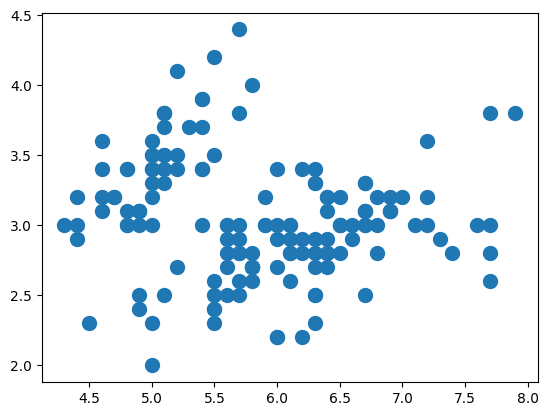

In [ ]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

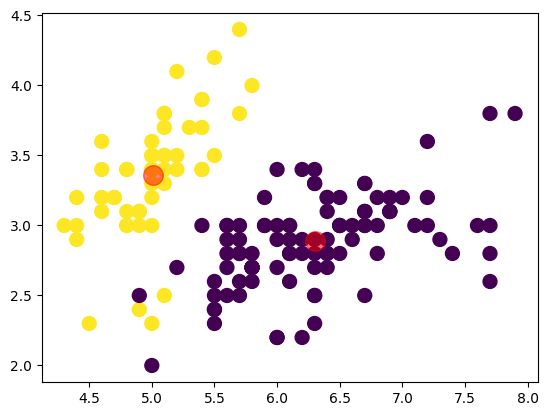

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


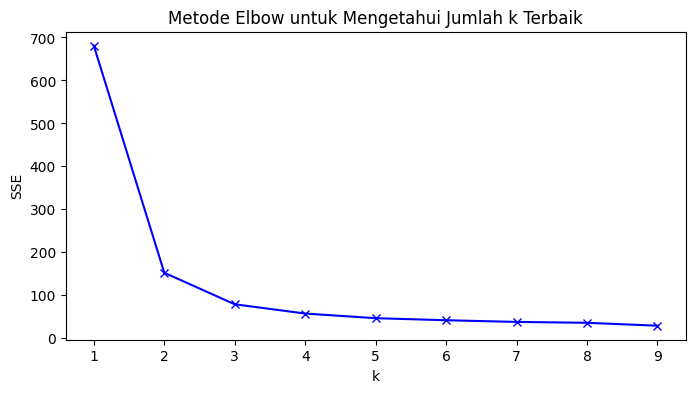

In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=57.371482025432464
k=5; SSE=46.56163015873017
k=6; SSE=41.801410101010106
k=7; SSE=37.9004378787879
k=8; SSE=35.84148320042531
k=9; SSE=29.04178431372549


**Praktikum 2**

import library

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

Pengantar k-Means

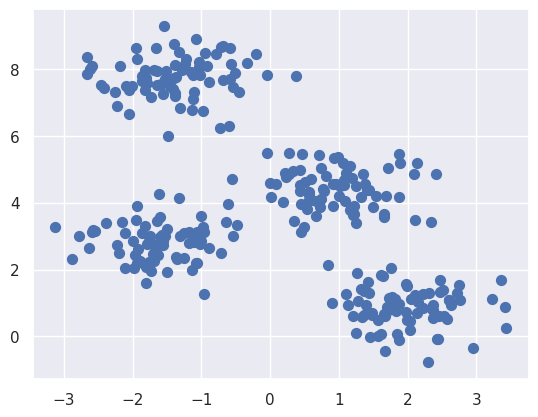

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

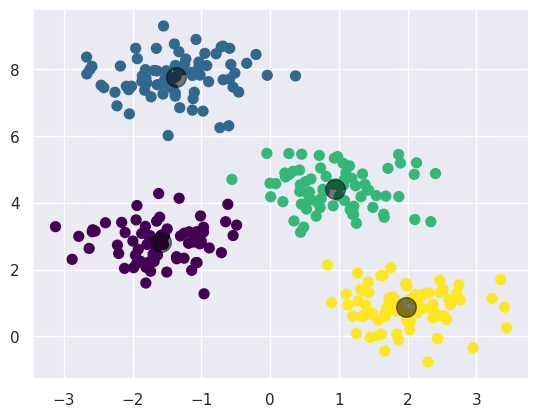

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

**Algoritma Expectation-Maximization**

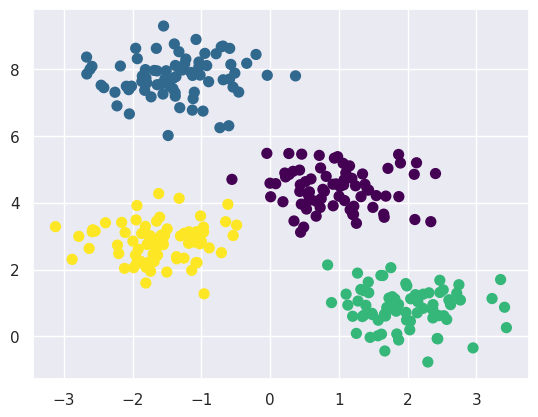

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

**Perubahan random**

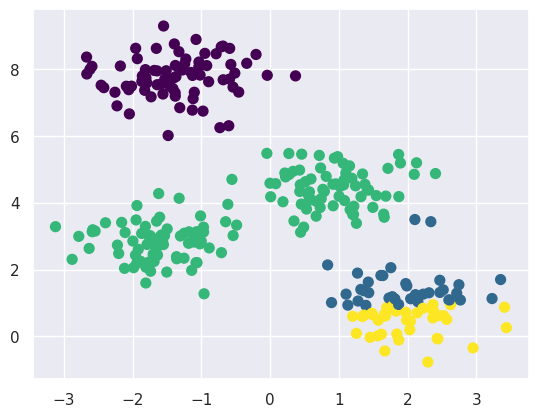

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

**Optimalisasi Jumlah Klaster**

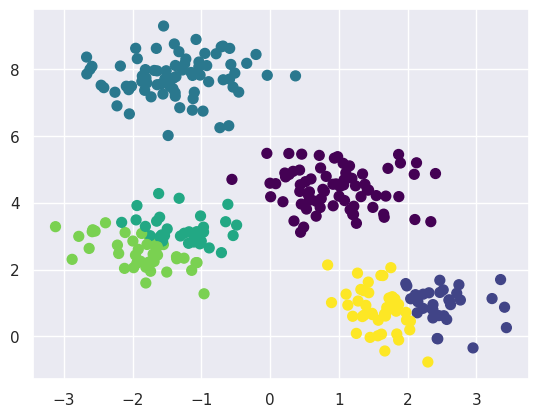

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

**Batas Klaster yang Tidak Selalu Linier**

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

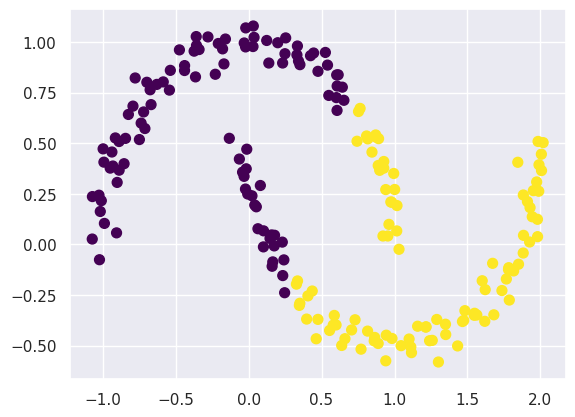

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


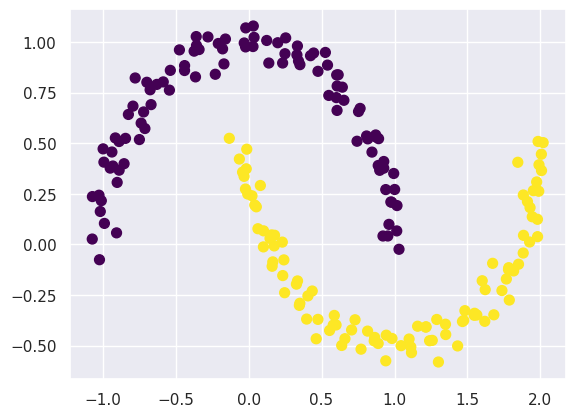

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

**Contoh Kasus 1: Karakter Angka**

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

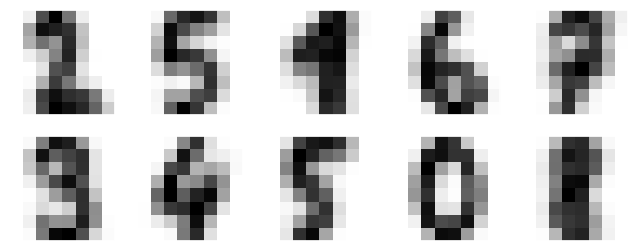

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

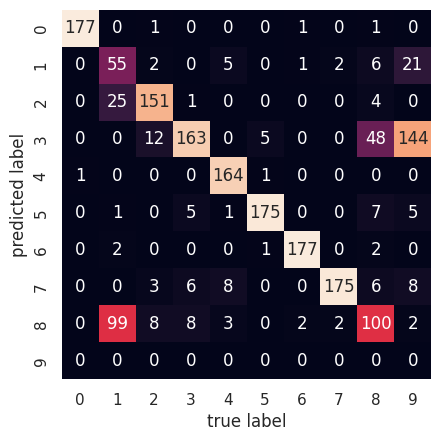

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

**Studi Kasus 2: Kompresi Citra**

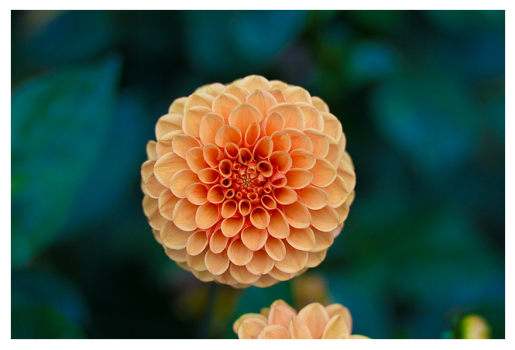

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [ ]:
flower.shape

(427, 640, 3)

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

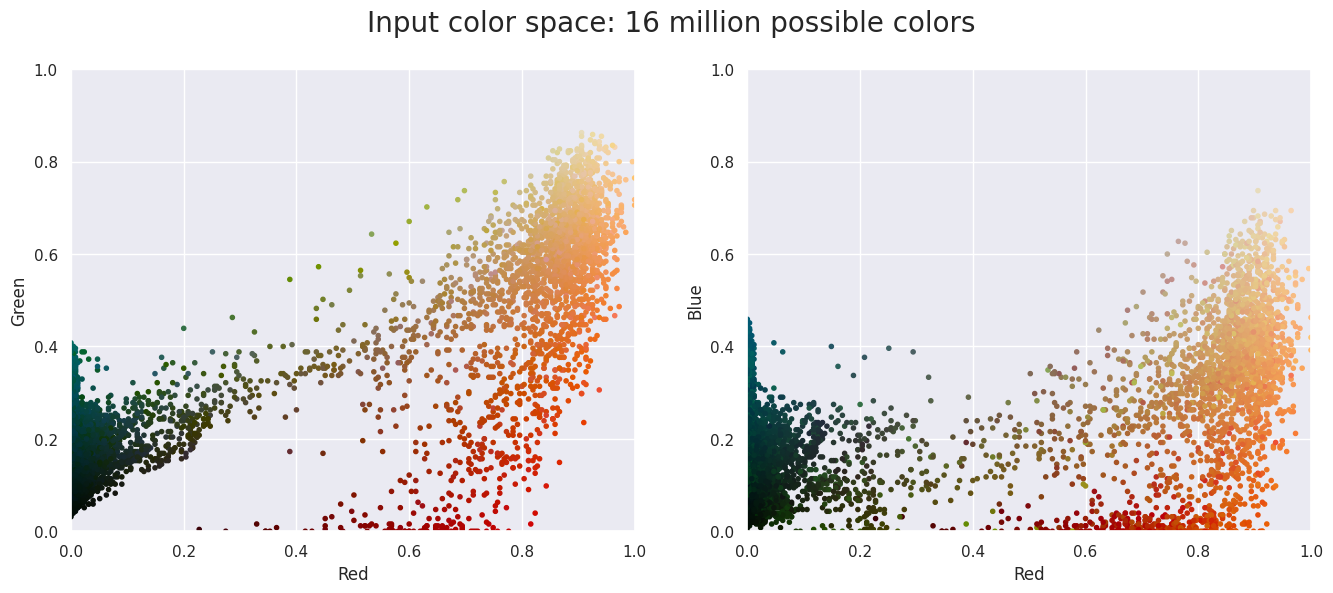

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

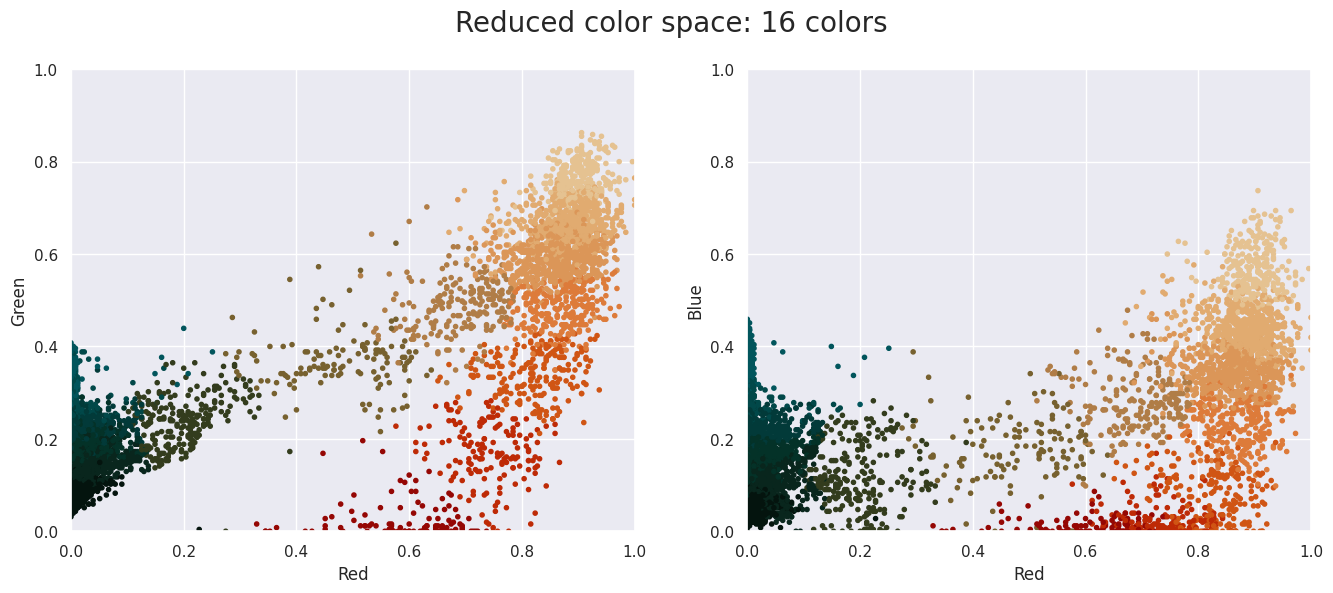

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

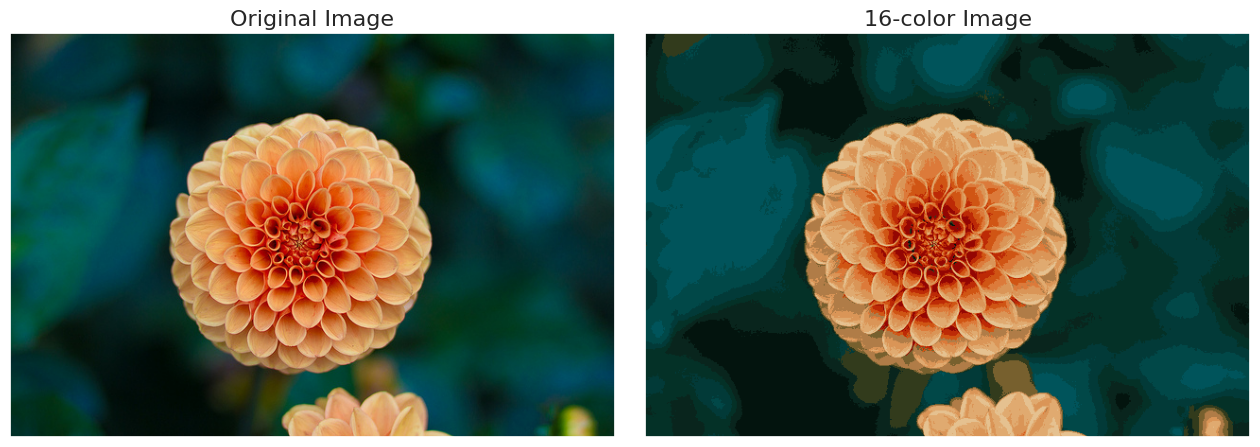

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

**PRAKTIKUM 3**

**Pembuatan Dataset Sintetis**

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]

X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)
print(X[:5])


[[ 0.49426097  1.45106697]
 [-1.42808099 -0.83706377]
 [ 0.33855918  1.03875871]
 [ 0.11900101 -1.05397553]
 [ 1.1224246   1.77493654]]


Visualisasikan data yang dihasilkan dengan cara ini:

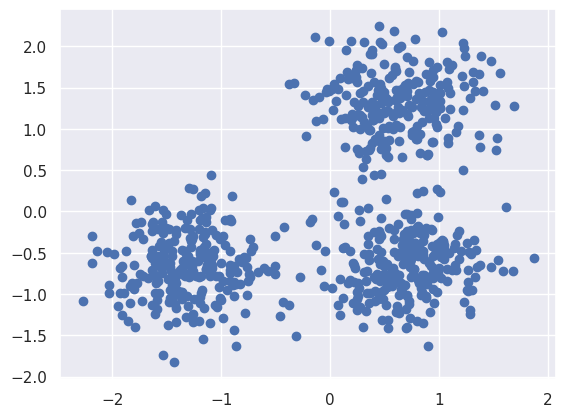

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1],)
plt.show()


**Compute DBSCAN**

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Hitung jumlah cluster (abaikan noise)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


**Evaluasi Kualitas Klasterisasi**

In [ ]:
from sklearn import metrics

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


- Homogeneity → apakah tiap klaster hanya berisi satu label asli.
- Completeness → apakah semua sampel dengan label asli yang sama masuk ke klaster yang sama.
- V-measure → rata-rata harmonik dari homogeneity dan completeness.
- Adjusted Rand Index (ARI) → kesesuaian antara klasterisasi dengan label asli.
- Adjusted Mutual Information (AMI) → kesamaan informasi antara klasterisasi dengan label asli.
- Silhouette Coefficient → seberapa baik data dikelompokkan (nilai mendekati 1 berarti bagus, mendekati 0 berarti berada di batas, negatif berarti salah klaster).

**Visualisasi Hasil Klasterisasi**

Kita akan memvisualisasikan hasil DBSCAN.

  - Core sample ditampilkan dengan titik besar.
  - Non-core sample ditampilkan dengan titik kecil.
  - Noise ditampilkan dengan warna hitam.

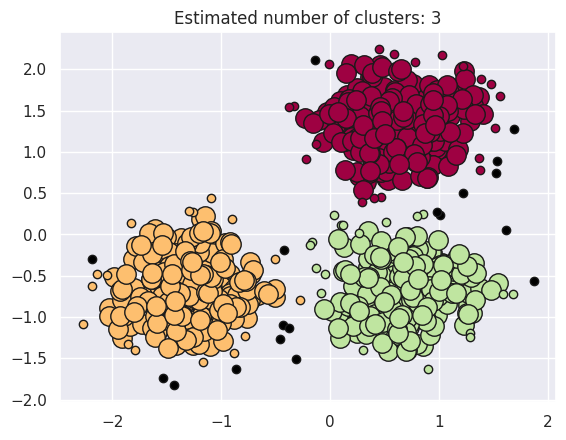

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Mask untuk core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
unique_labels = set(labels)

# Warna berbeda untuk tiap cluster
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise diberi warna hitam
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    # Non-core samples
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

Interpretasi visual:
- Titik besar berwarna → core samples dalam klaster.
- Titik kecil berwarna → non-core samples, tetap termasuk klaster.
- Titik hitam → noise/outlier.

**TUGAS PRAKTIKUM**

**1.  Tugas K-Means**

Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah kk yang terbaik.

In [11]:
# Gunakan data 'Mall_Customers.csv'
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (2).csv


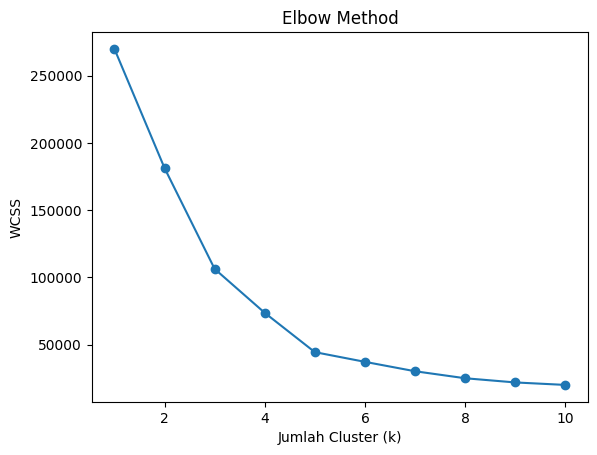

In [12]:
# Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset
data = pd.read_csv("Mall_Customers.csv")

# Pilih fitur
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]

# Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow
plt.plot(range(1, 11), wcss, marker="o")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


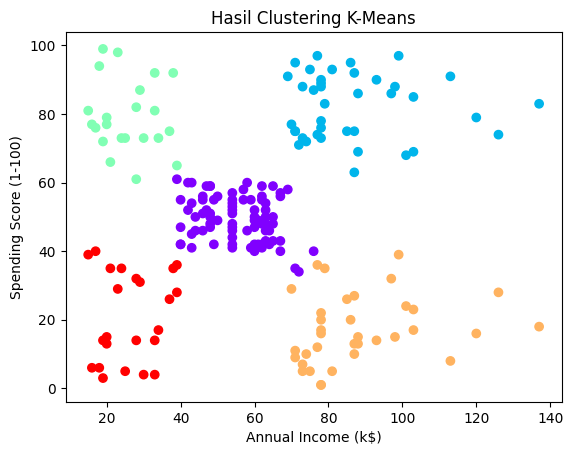

In [13]:
# Buatlah model K-Means dengan mempertimbangkan jumlah kk yang terbaik.
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
data["Cluster"] = kmeans.fit_predict(X)

# Visualisasi hasil clustering
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"],
            c=data["Cluster"], cmap="rainbow")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Hasil Clustering K-Means")
plt.show()

**2. Tugas DBSCAN**

    1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.

    2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.

    3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.

    4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).

    5. Lakukan eksperimen:
        - eps = 0.05, 0.1, 0.3, 0.5
        - min_samples = 3, 10, 20
        - Catat perubahan klaster, noise, dan kualitas evaluasi.

In [18]:
# 1. Buat dataset dan normalisasi
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Buat dataset make_moons
X, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Normalisasi
X = StandardScaler().fit_transform(X)

In [19]:
# 2. DBSCAN dasar (eps=0.2, min_samples=5)
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Model DBSCAN
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

# Jumlah klaster (label = -1 berarti noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Jumlah klaster:", n_clusters)
print("Jumlah noise:", n_noise)

Jumlah klaster: 2
Jumlah noise: 0


In [20]:
# 3. Evaluasi kualitas klaster
print("Homogeneity:", metrics.homogeneity_score(y_true, labels))
print("Completeness:", metrics.completeness_score(y_true, labels))
print("V-measure:", metrics.v_measure_score(y_true, labels))
print("Adjusted Rand Index:", metrics.adjusted_rand_score(y_true, labels))
print("Adjusted Mutual Information:", metrics.adjusted_mutual_info_score(y_true, labels))
print("Silhouette Coefficient:", metrics.silhouette_score(X, labels))

Homogeneity: 1.0
Completeness: 1.0
V-measure: 1.0
Adjusted Rand Index: 1.0
Adjusted Mutual Information: 1.0
Silhouette Coefficient: 0.3911598537138403


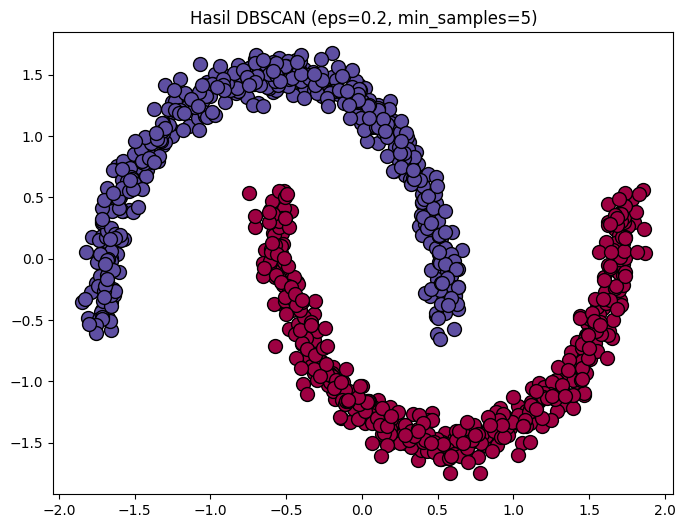

In [21]:
# 4. Visualisasi hasil DBSCAN

# Core sample mask
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col),
             markeredgecolor="k", markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col),
             markeredgecolor="k", markersize=5)

plt.title("Hasil DBSCAN (eps=0.2, min_samples=5)")
plt.show()

In [22]:
# Eksperimen variasi eps dan min_samples
params_eps = [0.05, 0.1, 0.3, 0.5]
params_min_samples = [3, 10, 20]

for eps in params_eps:
    for ms in params_min_samples:
        db = DBSCAN(eps=eps, min_samples=ms).fit(X)
        labels = db.labels_

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        print(f"eps={eps}, min_samples={ms} -> klaster={n_clusters}, noise={n_noise}")
        if n_clusters > 0:
            print("  ARI:", metrics.adjusted_rand_score(y_true, labels))
            print("  AMI:", metrics.adjusted_mutual_info_score(y_true, labels))
            print("  Silhouette:", metrics.silhouette_score(X, labels))
        print("-"*50)

eps=0.05, min_samples=3 -> klaster=69, noise=186
  ARI: 0.03004350976613907
  AMI: 0.243804587789628
  Silhouette: 0.11292949852882253
--------------------------------------------------
eps=0.05, min_samples=10 -> klaster=3, noise=970
  ARI: 0.0022825509789741014
  AMI: 0.0458636142209481
  Silhouette: -0.29419008256642176
--------------------------------------------------
eps=0.05, min_samples=20 -> klaster=0, noise=1000
--------------------------------------------------
eps=0.1, min_samples=3 -> klaster=2, noise=14
  ARI: 0.9721793882692121
  AMI: 0.942633562340455
  Silhouette: 0.2516903011504368
--------------------------------------------------
eps=0.1, min_samples=10 -> klaster=7, noise=57
  ARI: 0.5233989566001742
  AMI: 0.5698012090719349
  Silhouette: 0.16230611373347142
--------------------------------------------------
eps=0.1, min_samples=20 -> klaster=6, noise=850
  ARI: 0.016753669189074054
  AMI: 0.1509160954115189
  Silhouette: -0.3601946191938665
----------------------

Berdasarkan hasil percobaan, terlihat bahwa pada eps=0.05 dengan min_samples=3 terbentuk 69 klaster dengan 186 noise, namun kualitas evaluasi rendah (ARI=0.03, AMI=0.24, Silhouette=0.11). Saat min_samples dinaikkan menjadi 10, jumlah klaster menurun menjadi 3, tetapi noise meningkat drastis hingga 970, dan metrik evaluasi semakin buruk (ARI=0.002, AMI=0.046, Silhouette negatif). Bahkan pada min_samples=20, DBSCAN gagal total karena tidak terbentuk klaster dan semua data dianggap noise (1000). Pada eps=0.1 dengan min_samples=3, model menghasilkan 2 klaster dengan 14 noise serta evaluasi yang baik (ARI=0.97, AMI=0.94, Silhouette=0.25). Namun, ketika min_samples ditingkatkan, kualitas menurun: pada min_samples=10 terbentuk 7 klaster dengan 57 noise (ARI=0.52, AMI=0.57, Silhouette=0.16), sedangkan pada min_samples=20 hanya terbentuk 6 klaster tetapi noise melonjak menjadi 850 dengan kualitas sangat rendah (ARI=0.017, AMI=0.15, Silhouette negatif). Sementara itu, pada eps=0.3 dan 0.5, hasilnya konsisten stabil, yaitu terbentuk 2 klaster tanpa noise, dengan evaluasi sempurna (ARI=1.0, AMI=1.0, Silhouette=0.39) pada semua variasi min_samples (3, 10, dan 20). Hal ini menunjukkan bahwa kombinasi parameter eps yang cukup besar dan min_samples yang tepat mampu menghasilkan clustering optimal pada dataset make_moons.